In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
from numpy import arange,array,ones
from math import sin, cos, sqrt, atan2, radians, sqrt

df=pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv', encoding="ISO-8859-1", header=0)
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/28/2019,0:00,BROOKLYN,11208,40.685050,-73.875950,"(40.68505, -73.87595)",NaN,NaN,126 CHESTNUT STREET,...,Passing Too Closely,NaN,NaN,NaN,4122662,Sedan,NaN,NaN,NaN,NaN
1,04/28/2019,0:00,QUEENS,11419,40.690490,-73.816086,"(40.69049, -73.816086)",103 AVENUE,130 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4121710,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2,04/28/2019,0:00,NaN,NaN,40.699955,-73.986820,"(40.699955, -73.98682)",JAY STREET,SANDS STREET,NaN,...,Unspecified,NaN,NaN,NaN,4122602,Sedan,Bike,NaN,NaN,NaN
3,04/28/2019,0:01,QUEENS,11369,40.760900,-73.870180,"(40.7609, -73.87018)",99 STREET,31 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4123523,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,04/28/2019,0:05,BROOKLYN,11233,40.676884,-73.919230,"(40.676884, -73.91923)",HOWARD AVENUE,ATLANTIC AVENUE,NaN,...,Unspecified,Unspecified,NaN,NaN,4122095,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN


In [3]:
# converting the date to editable format
df['DATE']=pd.to_datetime(df['DATE'], format='%m/%d/%Y')

In [4]:
# Total number of collisions from 2013 to 2108
collisions_2013_2018=[[],[]]
for i in range(6):
    collisions_2013_2018[0].append(2013+i)
    collisions_2013_2018[1].append((df['DATE'].dt.year==(2013+i)).sum())
    
collisions_2013_2018

[[2013, 2014, 2015, 2016, 2017, 2018],
 [203729, 206030, 217692, 229788, 230997, 231465]]

In [5]:
# Creating a linear regression to find the trend for the number of collisions per year.
years = arange(2013,2019)
slope, intercept, r_value, p_value, std_err = stats.linregress(years,collisions_2013_2018[1])
stats.linregress(years, collisions_2013_2018[1])


LinregressResult(slope=6447.914285714285, intercept=-12775821.076190475, rvalue=0.9457694166820132, pvalue=0.004331689366288895, stderr=1107.3166194825742)

Text(0, 0.5, 'Total Number of Collisions')

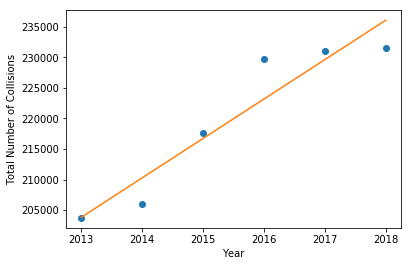

In [6]:
line = slope*years+intercept
plt.plot(years ,collisions_2013_2018[1],'o', years, line)
plt.xlabel('Year')
plt.ylabel('Total Number of Collisions')

In [68]:
# There is an increasing trend in the number of collisions each year

In [7]:
# Estimating the number of collisions per square kilometer of each zip code region for 2017

R = 6371 # radius of earth

# haversine function to calculate shortest distance between two points on a circular object
def hav(lat_1,lon_1, lat_2,lon_2): #lat_1, lon_1 for location-1; lat_2, lon_2 for location-2; 
    lat_1r,lat_2r=radians(lat_1),radians(lat_2)
    
    delta_latr=lat_2r-lat_1r
    delta_lonr=radians(lon_2-lon_1)
    
    a=sin(delta_latr/2)**2+cos(lat_1r)*cos(lat_2r)*sin(delta_lonr/2)**2
    return 2*R*atan2(sqrt(a),sqrt(1-a)) #distance in kilometers

In [8]:
# getting data from 2017 and where Borough information is provided
df_2017=df[(df['DATE'].dt.year==2017)&(df['BOROUGH'].notnull())] 

df_2017_clean={'ZIP CODE': df_2017['ZIP CODE'], 'LATITUDE': df_2017['LATITUDE'], 'LONGITUDE': df_2017['LONGITUDE']}
df_2017_clean=pd.DataFrame(df_2017_clean).dropna()
df_2017_clean=df_2017_clean[df_2017_clean['LATITUDE']!=0]

In [9]:
lats=df_2017_clean.groupby(['ZIP CODE'])['LATITUDE']
longs=df_2017_clean.groupby(['ZIP CODE'])['LONGITUDE']

#standard deviation of latitudes and longtitudes for each zip code
lat_stds=lats.std()
lat_mean=lats.mean()
lon_stds=longs.std()
lon_mean=longs.mean()

In [10]:
# extracting unique zip codes and standard deviations of latitudes and longtitudes 
zdata={'ZIP CODE': lats.std().index, 'STD_LAT': lats.std().reset_index()['LATITUDE'], 'STD_LON': longs.std().reset_index()['LONGITUDE'], \
                    'AREA': 0, 'LAT_MEAN': lat_mean.reset_index()['LATITUDE'],'LON_MEAN': lon_mean.reset_index()['LONGITUDE']}
zdata=pd.DataFrame(zdata)

In [11]:
loc2_lon=zdata['LON_MEAN']+zdata['STD_LON']
loc2_lat=zdata['LAT_MEAN']+zdata['STD_LAT']

zdata['loc2_lat']=loc2_lat
zdata['loc2_lon']=loc2_lon
zdata.head()

,ZIP CODE,STD_LAT,STD_LON,AREA,LAT_MEAN,LON_MEAN,loc2_lat,loc2_lon
0,10000.0,0.006955,0.005024,0,40.777948,-73.964634,40.784903,-73.959609
1,10001.0,0.003272,0.005335,0,40.749763,-73.994870,40.753035,-73.989535
2,10002.0,0.004739,0.006887,0,40.718263,-73.988608,40.723001,-73.981720
3,10003.0,0.005313,0.004178,0,40.732320,-73.988687,40.737633,-73.984509
4,10004.0,0.001596,0.002117,0,40.704626,-74.013811,40.706222,-74.011694


In [12]:
pos_lat_delta=zdata[['LAT_MEAN','LON_MEAN','loc2_lat','LON_MEAN']].apply(tuple, axis=1) #positions of lateral delta
pos_lon_delta=zdata[['LAT_MEAN','LON_MEAN','LAT_MEAN','loc2_lon']].apply(tuple, axis=1) 

lat_delta_dist=pd.Series(pos_lat_delta).apply(lambda x: hav(*x))
lon_delta_dist=pd.Series(pos_lon_delta).apply(lambda x: hav(*x))

In [13]:
area=math.pi*lat_delta_dist*lon_delta_dist
zdata['AREA']=area

zdata['COLLISION_COUNT']=zdata['STD_LAT']*0
zdata.head()

,ZIP CODE,STD_LAT,STD_LON,AREA,LAT_MEAN,LON_MEAN,loc2_lat,loc2_lon,COLLISION_COUNT
0,10000.0,0.006955,0.005024,1.027880,40.777948,-73.964634,40.784903,-73.959609,0.0
1,10001.0,0.003272,0.005335,0.513697,40.749763,-73.994870,40.753035,-73.989535,0.0
2,10002.0,0.004739,0.006887,0.960912,40.718263,-73.988608,40.723001,-73.981720,0.0
3,10003.0,0.005313,0.004178,0.653342,40.732320,-73.988687,40.737633,-73.984509,0.0
4,10004.0,0.001596,0.002117,0.099450,40.704626,-74.013811,40.706222,-74.011694,0.0


In [14]:
count=[]
for i in range(df_2017['ZIP CODE'].value_counts().shape[0]):
    zip_index=zdata['ZIP CODE']==df_2017['ZIP CODE'].value_counts().sort_index().index[i] #scan each zip code and find matching index location
    if zip_index.sum():
        count.append(df_2017['ZIP CODE'].value_counts().sort_index().iloc[i]) # create list of collision counts
zdata['COLLISION_COUNT']=np.transpose(count)

zdata['COLLISION_PER_KM2']=zdata['COLLISION_COUNT']/zdata['AREA']
zdata.head()

,ZIP CODE,STD_LAT,STD_LON,AREA,LAT_MEAN,LON_MEAN,loc2_lat,loc2_lon,COLLISION_COUNT,COLLISION_PER_KM2
0,10000.0,0.006955,0.005024,1.027880,40.777948,-73.964634,40.784903,-73.959609,74,71.992828
1,10001.0,0.003272,0.005335,0.513697,40.749763,-73.994870,40.753035,-73.989535,1833,3568.252486
2,10002.0,0.004739,0.006887,0.960912,40.718263,-73.988608,40.723001,-73.981720,1650,1717.117884
3,10003.0,0.005313,0.004178,0.653342,40.732320,-73.988687,40.737633,-73.984509,964,1475.490414
4,10004.0,0.001596,0.002117,0.099450,40.704626,-74.013811,40.706222,-74.011694,207,2081.451211


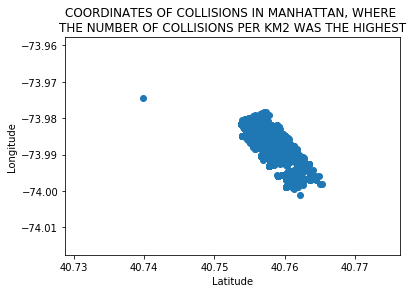

In [38]:
# In 2017, for the zipcodes with at least 1000 collisions, coordinates of collisions  
# at the zipcode where there was the highest number of collisions per square kilometer

max1=zdata[zdata['COLLISION_COUNT']>=1000]['COLLISION_PER_KM2'].max()
zdata_maxcolperkm_zip=zdata[zdata['COLLISION_PER_KM2']==max1]['ZIP CODE']
maxcolperkm_borough=df[df['ZIP CODE']==zdata_maxcol_zip.iloc[0]]['BOROUGH'].unique()

x = df_2017_clean[df_2017_clean['ZIP CODE']==zdata_maxcolperkm_zip.iloc[0]]['LATITUDE']
y =df_2017_clean[df_2017_clean['ZIP CODE']==zdata_maxcolperkm_zip.iloc[0]]['LONGITUDE']

plt.scatter(x, y)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('COORDINATES OF COLLISIONS IN {}, WHERE \nTHE NUMBER OF COLLISIONS PER KM2 WAS THE HIGHEST'.format(maxcolperkm_borough[0]))
plt.show()
